In [1]:
import pandas as pd
import re

In [45]:
variants = [
    "aws_large",
    "aws_small",
    "minio_large",
    "minio_small",
]

dfs = []

for variant in variants:
    df = pd.read_csv(variant + ".csv")
    df = df.set_index("t_parsed")
    df = df.rename({"cumulative_parsed": variant}, axis=1)
    df.index = pd.to_datetime(df.index.map(lambda x: re.sub(r'0 days ', '', x)), format="%H:%M:%S")
    df = df.resample("10s").sum()
    dfs.append(df)

In [49]:
combined = pd.concat(dfs, axis=1)
combined.head(5)

,aws_large,aws_small,minio_large,minio_small
t_parsed,,,,
1900-01-01 00:00:00,2.000000,1.350000,0.01856,7.556000
1900-01-01 00:00:10,18.900000,5.530000,16.25000,22.665000
1900-01-01 00:00:20,35.750000,18.590000,26.57000,24.480000
1900-01-01 00:00:30,3.573151,10.479999,16.13200,5.730000
1900-01-01 00:00:40,1.980142,0.000175,3.78100,1.591226


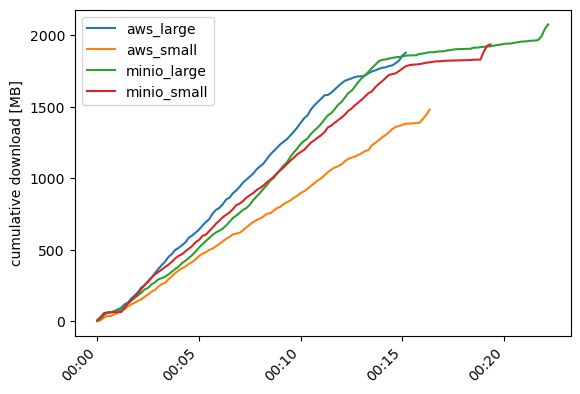

In [74]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

plottable = combined.cumsum().reset_index()
for variant in variants:
    ax.plot("t_parsed", variant, data=plottable)
dateformat = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(dateformat)
ax.set_ylabel("cumulative download [MB]")
fig.autofmt_xdate(rotation=45)
ax.legend(loc="best")

In [75]:
fig.save("combined.png")

AttributeError: 'Figure' object has no attribute 'save'